**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [22]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [23]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [24]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [25]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [26]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


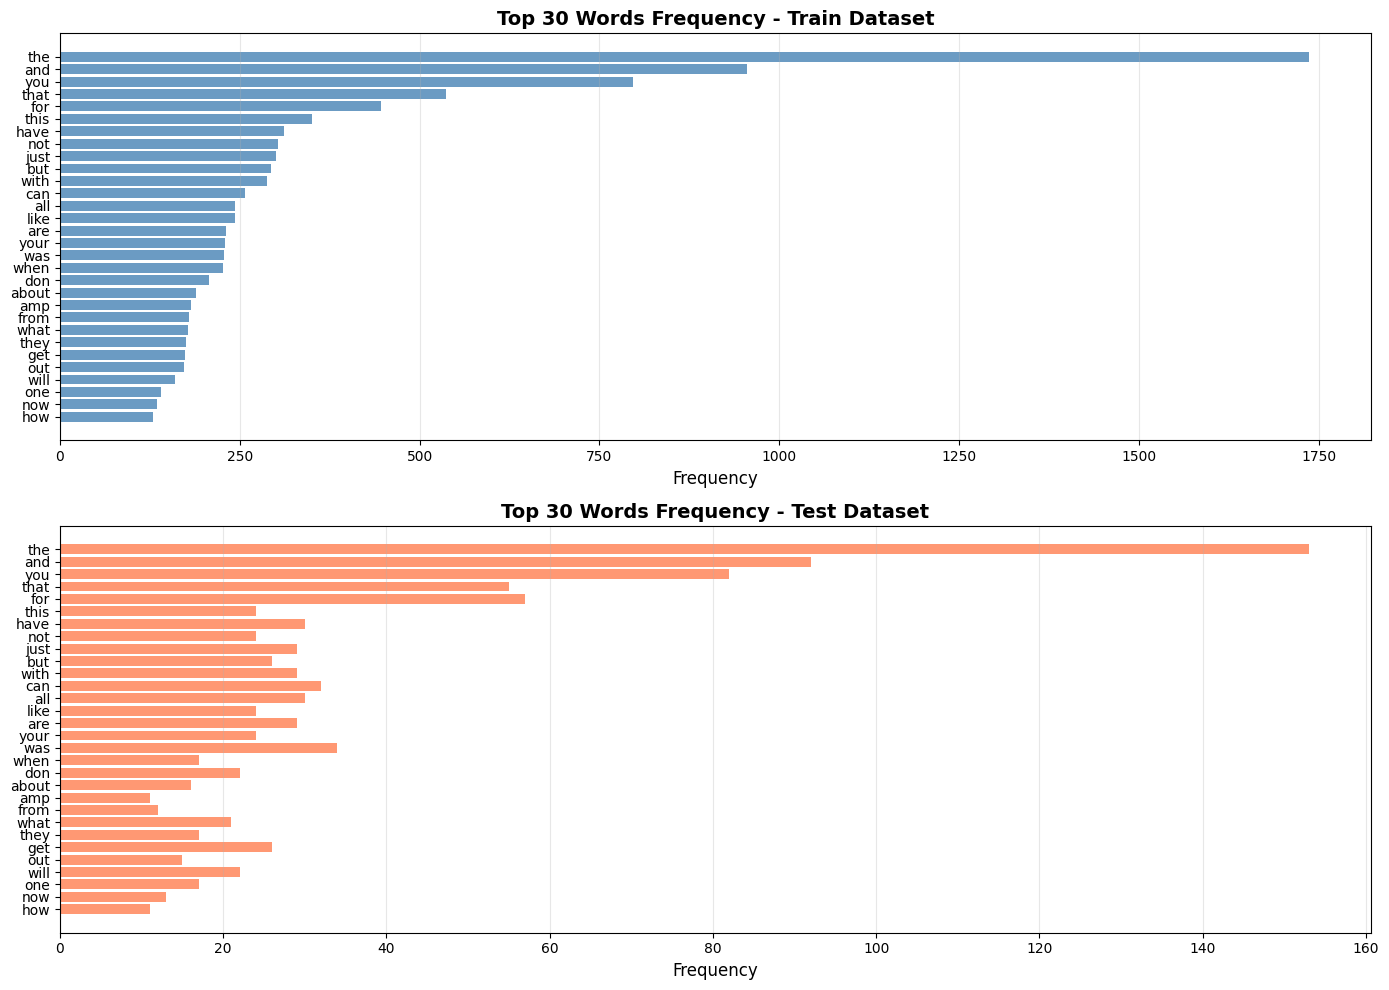

In [27]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Function to extract and count words
def get_word_freq(df, text_column='text'):
    all_words = []
    for text in df[text_column].dropna():
        # Convert to lowercase and extract words
        words = re.findall(r'\b[a-z]{3,}\b', text.lower())
        all_words.extend(words)
    return Counter(all_words)

# Get word frequencies for both datasets
train_word_freq = get_word_freq(train_df)
test_word_freq = get_word_freq(test_df)

# Get top 30 words from train dataset
top_30_words = [word for word, _ in train_word_freq.most_common(30)]

# Create data for plotting
train_counts = [train_word_freq[word] for word in top_30_words]
test_counts = [test_word_freq[word] for word in top_30_words]

# Create the plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot for train dataset
axes[0].barh(range(len(top_30_words)), train_counts, color='steelblue', alpha=0.8)
axes[0].set_yticks(range(len(top_30_words)))
axes[0].set_yticklabels(top_30_words)
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_title('Top 30 Words Frequency - Train Dataset', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Plot for test dataset
axes[1].barh(range(len(top_30_words)), test_counts, color='coral', alpha=0.8)
axes[1].set_yticks(range(len(top_30_words)))
axes[1].set_yticklabels(top_30_words)
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_title('Top 30 Words Frequency - Test Dataset', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [28]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [29]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [30]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

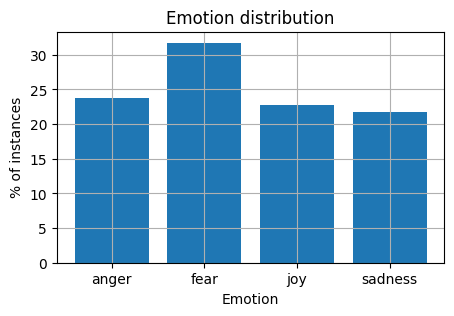

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [34]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [35]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [36]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [37]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [39]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [40]:
"😂" in feature_names

False

In [41]:
"hate" in feature_names

True

Let's try using another tokenizer below.

In [42]:
import nltk
nltk.download('punkt_tab')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
g:\中正大學\Data-Mining\Lab 2\DM2025-Lab2-Exercise\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [43]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [45]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzer (TF-IDF)
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

## check dimension
print("Shape:", train_data_TFIDF_features_1000.shape)
print("\nArray representation (first 5 rows):")
print(train_data_TFIDF_features_1000.toarray()[:5])

# observe some feature names
feature_names_1000 = TFIDF_1000.get_feature_names_out()
print("\nFeature names [100:110]:")
print(feature_names_1000[100:110])

Shape: (3613, 1000)

Array representation (first 5 rows):
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.35691013 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11977494 0.         ... 0.         0.         0.        ]]

Feature names [100:110]:
['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [48]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'joy', 'anger', 'fear', 'fear', 'joy', 'joy',
       'sadness', 'anger'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [49]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [50]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [51]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [52]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

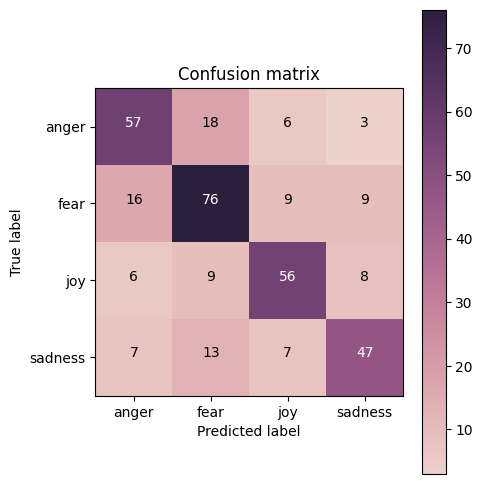

In [53]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [54]:
# Answer here
'''
The model performs best on fear and joy, but Anger and fear are frequently confused with each other.
The model also struggles to distinguish between negative emotions (anger, fear, sadness), which often share similar vocabulary and sentiment.
'''


'\nThe model performs best on fear and joy, but Anger and fear are frequently confused with each other.\nThe model also struggles to distinguish between negative emotions (anger, fear, sadness), which often share similar vocabulary and sentiment.\n'

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

g:\中正大學\Data-Mining\Lab 2\DM2025-Lab2-Exercise\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train shape: (3613, 1000)
Test shape: (347, 1000)

Model Performance:
Training Accuracy: 0.8826
Test Accuracy: 0.7723

Classification Report (Test Set):
              precision    recall  f1-score   support

       anger       0.74      0.76      0.75        84
        fear       0.78      0.79      0.78       110
         joy       0.85      0.78      0.82        79
     sadness       0.72      0.74      0.73        74

    accuracy                           0.77       347
   macro avg       0.77      0.77      0.77       347
weighted avg       0.77      0.77      0.77       347


Confusion Matrix:
[[64 11  4  5]
 [10 87  2 11]
 [ 7  5 62  5]
 [ 5  9  5 55]]


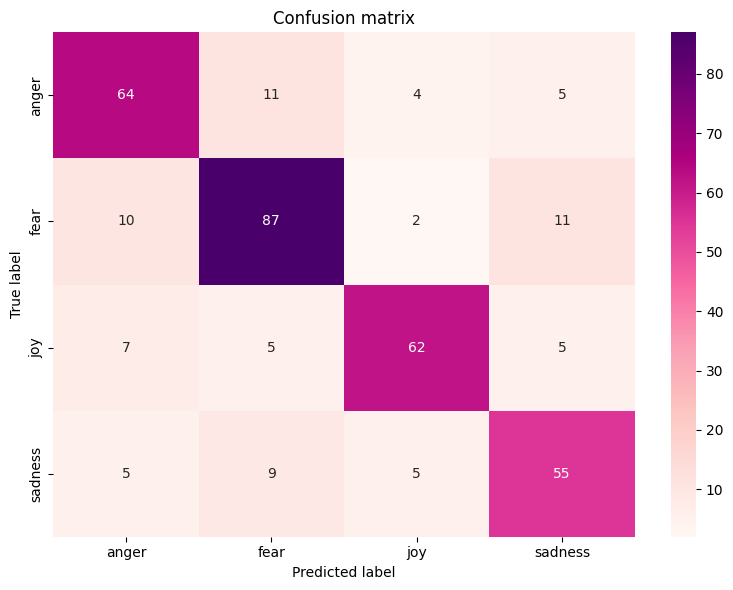

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# build analyzer (Bag-of-Words)
BOW_1000 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_1000.fit(train_df['text'])
train_data_BOW_features_1000 = BOW_1000.transform(train_df['text'])
test_data_BOW_features_1000 = BOW_1000.transform(test_df['text'])

## check dimension
print("Train shape:", train_data_BOW_features_1000.shape)
print("Test shape:", test_data_BOW_features_1000.shape)

# prepare labels
y_train = train_df['emotion']
y_test = test_df['emotion']

# build Naive Bayes model
NB_model = MultinomialNB()

# train the model
NB_model.fit(train_data_BOW_features_1000, y_train)

# make predictions
y_train_pred = NB_model.predict(train_data_BOW_features_1000)
y_test_pred = NB_model.predict(test_data_BOW_features_1000)

# evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\n" + "="*50)
print("Model Performance:")
print("="*50)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# classification report
print("\n" + "="*50)
print("Classification Report (Test Set):")
print("="*50)
print(classification_report(y_test, y_test_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', 
            xticklabels=NB_model.classes_, 
            yticklabels=NB_model.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.tight_layout()
plt.show()

Key Insights

1. Naive Bayes outperforms the previous model across all emotion categories<br>
2. Fear remains the easiest to classify (highest accuracy in both models)<br>
3. Sadness showed the most improvement - went from the weakest to competitive performance<br>
4. Confusion patterns are clearer - darker diagonal shows stronger correct classifications<br>
5. Negative emotion separation improved - less confusion between anger, fear, and sadness<br>


---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [56]:
# Answer here
'''
Through the emotion-classification results, we can see that Naive Bayes outperforms the Decision Tree model in terms of accuracy. This is because Naive Bayes is a simple model that assumes independence between features, which is a reasonable assumption for text classification tasks. On the other hand, Decision Tree models can capture complex relationships between features, which may not be present in the text data.
'''

'\nThrough the emotion-classification results, we can see that Naive Bayes outperforms the Decision Tree model in terms of accuracy. This is because Naive Bayes is a simple model that assumes independence between features, which is a reasonable assumption for text classification tasks. On the other hand, Decision Tree models can capture complex relationships between features, which may not be present in the text data.\n'

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [57]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [58]:
import keras

In [59]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [60]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 565     anger
842     anger
2299      joy
67      anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [61]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [62]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [63]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [64]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3656 - loss: 1.3261 - val_accuracy: 0.4582 - val_loss: 1.2733
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6394 - loss: 0.9829 - val_accuracy: 0.6513 - val_loss: 0.9258
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.5701 - val_accuracy: 0.6916 - val_loss: 0.7985
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8580 - loss: 0.3989 - val_accuracy: 0.6945 - val_loss: 0.7941
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8973 - loss: 0.3050 - val_accuracy: 0.6801 - val_loss: 0.8140
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9184 - loss: 0.2467 - val_accuracy: 0.6916 - val_loss: 0.8893
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9355 - loss: 0.2001 - val_accuracy: 0.6888 - val_loss: 0.9149
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9460 - loss: 0.1727 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [65]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[8.77254069e-01, 2.35142671e-02, 9.42901000e-02, 4.94151423e-03],
       [1.20484731e-13, 5.42946052e-14, 1.00000000e+00, 4.02414560e-12],
       [9.60384341e-07, 8.33037461e-07, 9.99981761e-01, 1.64106150e-05],
       [4.11147863e-01, 1.07011326e-01, 2.09202636e-02, 4.60920572e-01],
       [5.48525941e-06, 9.99951363e-01, 3.19047651e-08, 4.31415683e-05]],
      dtype=float32)

In [66]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'joy', 'joy', 'sadness', 'fear'], dtype=object)

In [67]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [68]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.365624,1.326052,0.458213,1.273272
1,1,0.639358,0.982949,0.651297,0.925780
2,2,0.797952,0.570099,0.691643,0.798461
3,3,0.858013,0.398860,0.694524,0.794072
4,4,0.897315,0.304997,0.680115,0.813956
5,5,0.918350,0.246717,0.691643,0.889285
6,6,0.935511,0.200078,0.688761,0.914874
7,7,0.946028,0.172714,0.680115,0.952545
8,8,0.956823,0.146371,0.671470,1.064559
9,9,0.959037,0.129822,0.671470,1.083409


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


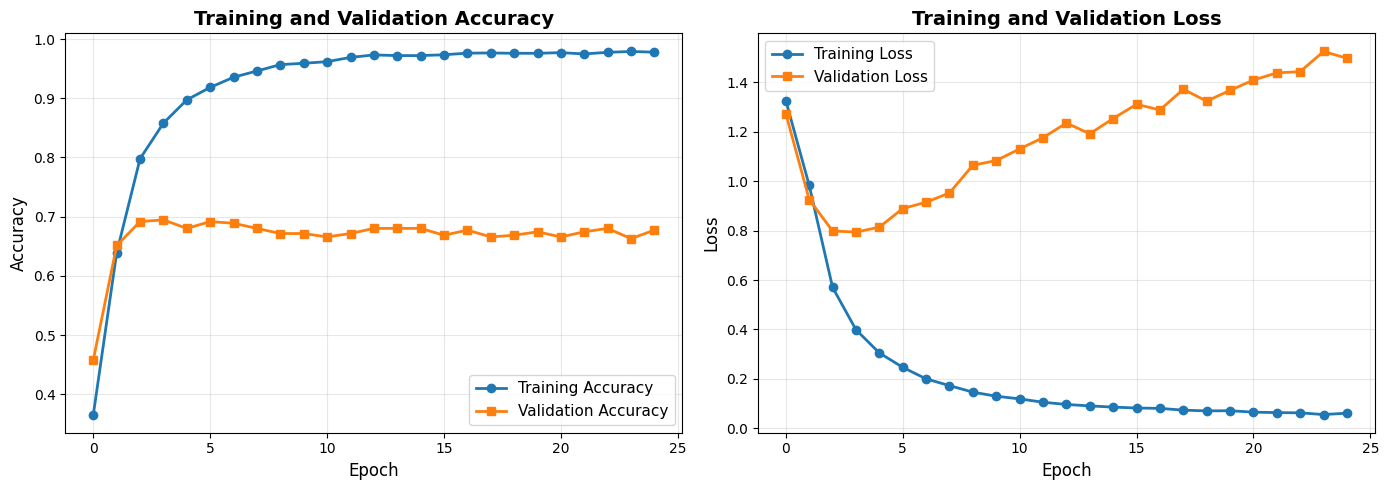

Training Log Summary:
Total Epochs: 25

Final Training Accuracy: 0.9779
Final Validation Accuracy: 0.6772

Final Training Loss: 0.0613
Final Validation Loss: 1.4974

Best Validation Accuracy: 0.6945 (Epoch 4)
Best Training Accuracy: 0.9790 (Epoch 24)


In [69]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt

# Load the training log
training_log = pd.read_csv("logs/training_log.csv")

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Training and Validation Accuracy
axes[0].plot(training_log['epoch'], training_log['accuracy'], 
             marker='o', label='Training Accuracy', linewidth=2, markersize=6)
axes[0].plot(training_log['epoch'], training_log['val_accuracy'], 
             marker='s', label='Validation Accuracy', linewidth=2, markersize=6)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Training and Validation Loss
axes[1].plot(training_log['epoch'], training_log['loss'], 
             marker='o', label='Training Loss', linewidth=2, markersize=6)
axes[1].plot(training_log['epoch'], training_log['val_loss'], 
             marker='s', label='Validation Loss', linewidth=2, markersize=6)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display summary statistics
print("Training Log Summary:")
print("="*50)
print(f"Total Epochs: {len(training_log)}")
print(f"\nFinal Training Accuracy: {training_log['accuracy'].iloc[-1]:.4f}")
print(f"Final Validation Accuracy: {training_log['val_accuracy'].iloc[-1]:.4f}")
print(f"\nFinal Training Loss: {training_log['loss'].iloc[-1]:.4f}")
print(f"Final Validation Loss: {training_log['val_loss'].iloc[-1]:.4f}")
print(f"\nBest Validation Accuracy: {training_log['val_accuracy'].max():.4f} (Epoch {training_log['val_accuracy'].idxmax() + 1})")
print(f"Best Training Accuracy: {training_log['accuracy'].max():.4f} (Epoch {training_log['accuracy'].idxmax() + 1})")

The model exhibits severe overfitting, it has memorized the training data instead of learning the general concepts. It's now scoring 98% on the practice questions but is failing the real tests, with its score stuck at 68%. I've stopped the training much earlier to prevent overfitting.


---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [70]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
565,10565,@SlaveGuinevere its more of a little prick tha...,"[@, SlaveGuinevere, its, more, of, a, little, ..."
842,10842,@savageimiike one of my favorite songs brother...,"[@, savageimiike, one, of, my, favorite, songs..."
2299,30295,Use your smile to change the world. Don't let ...,"[Use, your, smile, to, change, the, world, ., ..."
67,10067,Once again the only thing on my feed is naay r...,"[Once, again, the, only, thing, on, my, feed, ..."
1230,20373,Saga: When all of your devices and teles fail ...,"[Saga, :, When, all, of, your, devices, and, t..."


In [71]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'SlaveGuinevere', 'its', 'more', 'of', 'a', 'little', 'prick', 'than', 'a', 'sting', '..........', 'but', 'you', 'have', 'to', 'come', 'to', 'Tennessee', 'to', 'get', 'it1']),
       list(['@', 'savageimiike', 'one', 'of', 'my', 'favorite', 'songs', 'brother', ',', 'real', 'talk', '.']),
       list(['Use', 'your', 'smile', 'to', 'change', 'the', 'world', '.', 'Do', "n't", 'let', 'the', 'world', 'change', 'your', 'smile', '.', "'", '#', 'quote', '#', 'actorslife', '#', 'smile', '#', 'love', '#', 'hardworkpaysoff', '#', 'fun'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [72]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [73]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.37731123,  0.22003748,  0.10364508,  0.10637953, -0.09587967,
       -1.5170021 ,  0.59033823,  1.2049692 , -0.41738352, -0.55467206,
       -0.43676826, -1.0747064 , -0.6354876 ,  0.50088704, -0.12299054,
       -0.6364194 ,  0.05405357, -0.6404993 ,  0.1757121 , -0.8922825 ,
       -0.02634032,  0.616817  ,  0.6822916 ,  0.2638212 , -0.26091352,
        0.0468932 , -0.53753304,  0.55902004, -0.29706874,  0.23325497,
        0.62708986, -0.12416858,  0.59266657, -0.64268327, -0.38026306,
        0.25378236,  0.45612782, -0.09601748, -0.48450714, -1.0046294 ,
       -0.0256277 ,  0.39650673, -0.3587107 ,  0.6578444 ,  0.8076791 ,
        0.35565823, -0.8133511 , -0.17470519,  0.41091767,  0.1407461 ,
       -0.23696293, -0.4041912 ,  0.3737621 , -0.3095332 , -0.31668338,
       -0.49773008, -0.08288883, -0.128214  , -0.3088705 , -0.29372248,
        0.1187263 ,  0.24411097,  0.2715539 ,  0.19227642, -0.7613996 ,
        0.40322503,  0.11121778,  0.46414232, -1.6151465 ,  0.49

In [74]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9336564540863037),
 ('bday', 0.9260284900665283),
 ('Be', 0.9235587120056152),
 ('O', 0.9146804809570312),
 ("'you", 0.9131501317024231),
 ('Kik', 0.9114680290222168),
 ('birthday', 0.9094120264053345),
 ('depress', 0.9025608897209167),
 ('TheNiceBot', 0.9019590616226196),
 ('.\\nA', 0.8993006944656372)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [75]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)


load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [76]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [77]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [78]:
# Answer here
'''
1.One common approach is to use the average of the word vectors in the sentence as the sentence vector. This is called the "mean pooling" method.\n
2.Another approach is to use the "max pooling" method, which takes the maximum value of each word vector in the sentence as the sentence vector.\n
3.We can also use the "min pooling" method, which takes the minimum value of each word vector in the sentence as the sentence vector.\n
'''


'\n1.One common approach is to use the average of the word vectors in the sentence as the sentence vector. This is called the "mean pooling" method.\n\n2.Another approach is to use the "max pooling" method, which takes the maximum value of each word vector in the sentence as the sentence vector.\n\n3.We can also use the "min pooling" method, which takes the minimum value of each word vector in the sentence as the sentence vector.\n\n'

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [79]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [80]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [81]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [82]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [83]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

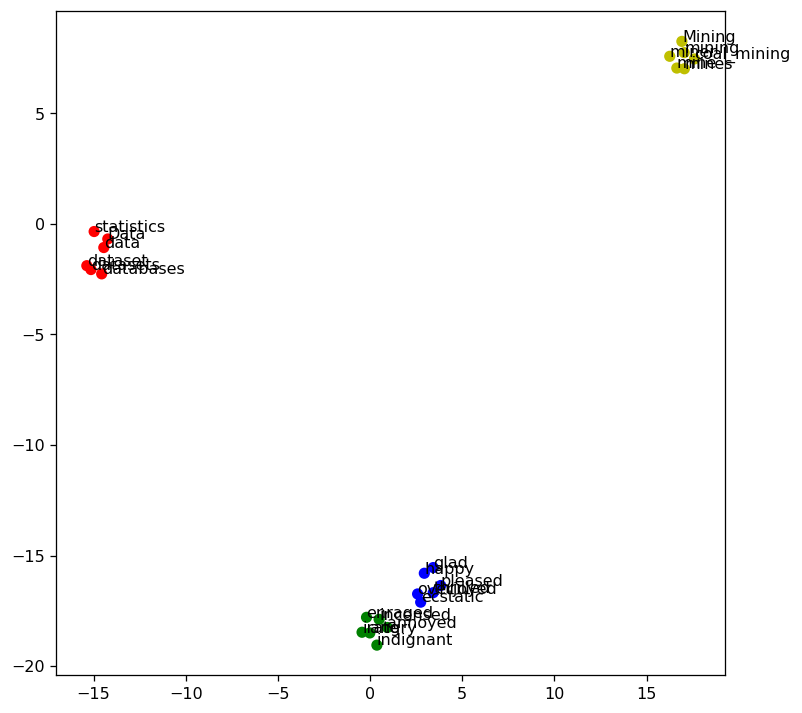

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

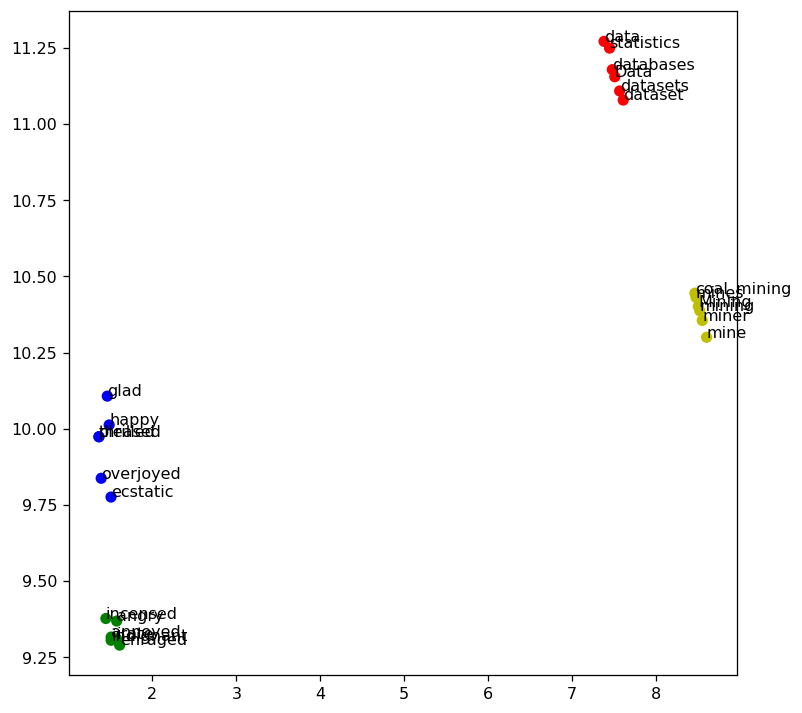

In [85]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

Total words: 64
Vector shape: (64, 300)

Training t-SNE...
Training UMAP...


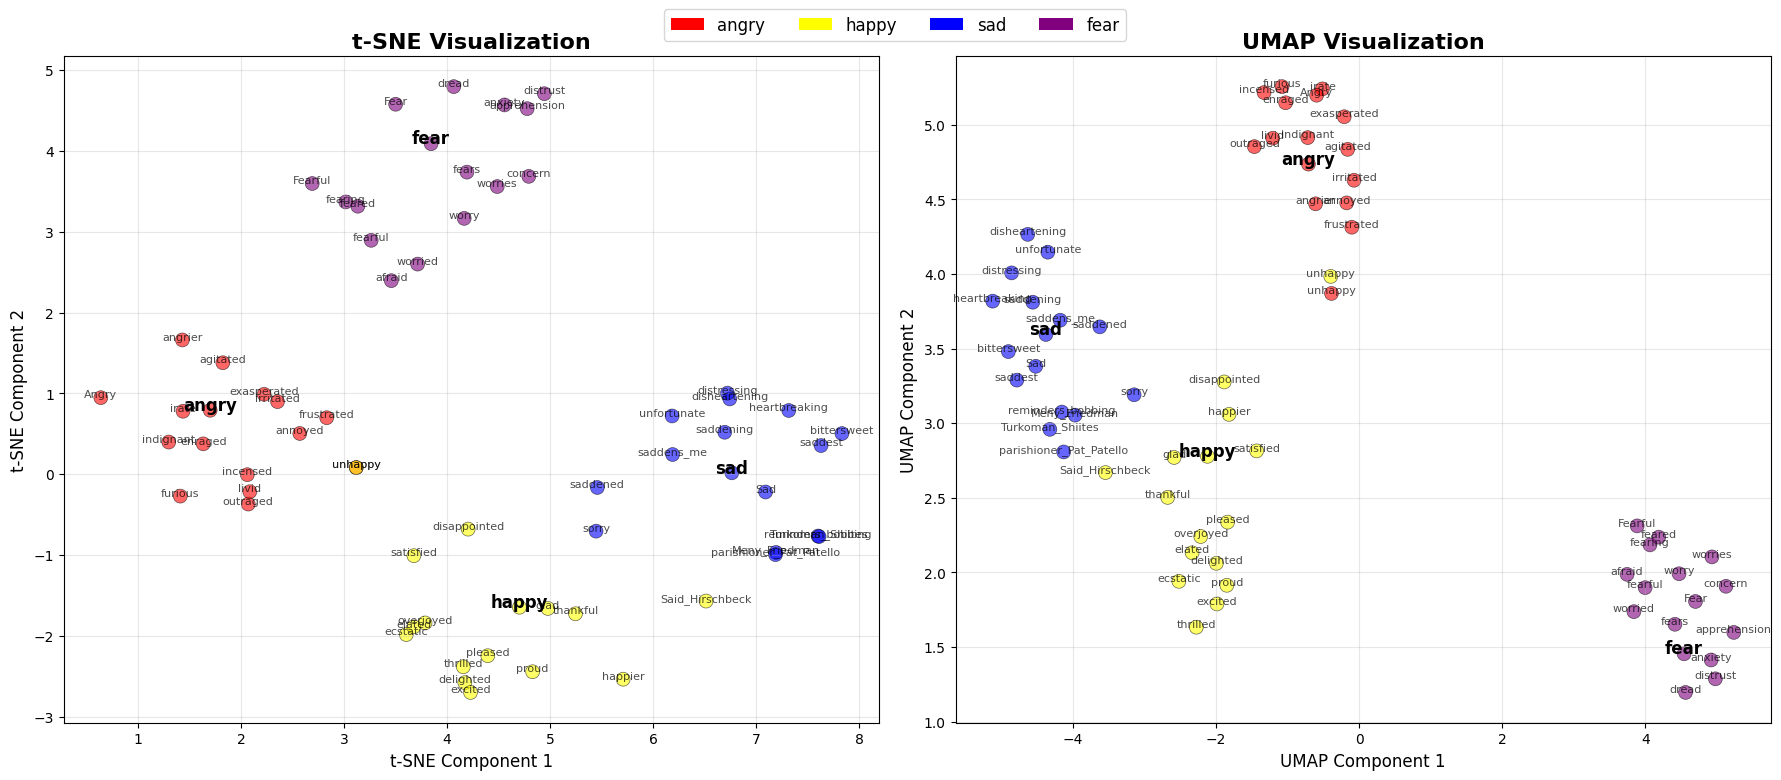


Sample of most similar words for each emotion:

ANGRY:
  irate: 0.814
  enraged: 0.771
  indignant: 0.701
  incensed: 0.688
  annoyed: 0.685

HAPPY:
  glad: 0.741
  pleased: 0.663
  ecstatic: 0.663
  overjoyed: 0.660
  thrilled: 0.651

SAD:
  saddening: 0.727
  Sad: 0.661
  saddened: 0.660
  heartbreaking: 0.657
  disheartening: 0.651

FEAR:
  fearful: 0.697
  fears: 0.687
  Fear: 0.657
  fearing: 0.641
  worry: 0.638


In [86]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import numpy as np

# w2v model (assuming w2v_google_model is already loaded)
model = w2v_google_model

# Define target emotion words
emotion_words = ["angry", "happy", "sad", "fear"]
colors = ['red', 'yellow', 'blue', 'purple']

# Get 15 most similar words for each emotion
target_words = []
word_colors = []
word_labels = []

for emotion, color in zip(emotion_words, colors):
    # Get 15 most similar words (plus the emotion word itself)
    similar_words = model.most_similar(emotion, topn=15)
    
    # Add the emotion word itself
    target_words.append(emotion)
    word_colors.append(color)
    word_labels.append(emotion)
    
    # Add the 15 similar words
    for word, similarity in similar_words:
        target_words.append(word)
        word_colors.append(color)
        word_labels.append(f"{emotion}")

# Get word vectors
X_train = model[target_words]
print(f"Total words: {len(target_words)}")
print(f"Vector shape: {X_train.shape}")

# t-SNE visualization
print("\nTraining t-SNE...")
tsne = TSNE(n_components=2, metric='cosine', random_state=28, perplexity=30)
X_tsne = tsne.fit_transform(X_train)

# UMAP visualization
print("Training UMAP...")
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28, n_neighbors=15)
X_umap = umap_model.fit_transform(X_train)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot t-SNE
axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=word_colors, s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
for i, (label, x, y) in enumerate(zip(target_words, X_tsne[:, 0], X_tsne[:, 1])):
    # Highlight emotion words with larger font
    if label in emotion_words:
        axes[0].annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', 
                        fontsize=12, fontweight='bold', ha='center')
    else:
        axes[0].annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', 
                        fontsize=8, ha='center', alpha=0.7)
axes[0].set_title('t-SNE Visualization', fontsize=16, fontweight='bold')
axes[0].set_xlabel('t-SNE Component 1', fontsize=12)
axes[0].set_ylabel('t-SNE Component 2', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Plot UMAP
axes[1].scatter(X_umap[:, 0], X_umap[:, 1], c=word_colors, s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
for i, (label, x, y) in enumerate(zip(target_words, X_umap[:, 0], X_umap[:, 1])):
    # Highlight emotion words with larger font
    if label in emotion_words:
        axes[1].annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', 
                        fontsize=12, fontweight='bold', ha='center')
    else:
        axes[1].annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', 
                        fontsize=8, ha='center', alpha=0.7)
axes[1].set_title('UMAP Visualization', fontsize=16, fontweight='bold')
axes[1].set_xlabel('UMAP Component 1', fontsize=12)
axes[1].set_ylabel('UMAP Component 2', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=emotion) 
                   for emotion, color in zip(emotion_words, colors)]
fig.legend(handles=legend_elements, loc='upper center', ncol=4, fontsize=12, 
          bbox_to_anchor=(0.5, 0.98))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print some example similar words
print("\n" + "="*60)
print("Sample of most similar words for each emotion:")
print("="*60)
for emotion in emotion_words:
    similar = model.most_similar(emotion, topn=5)
    print(f"\n{emotion.upper()}:")
    for word, score in similar:
        print(f"  {word}: {score:.3f}")

---